# What's Cooking?

![](https://images.pexels.com/photos/1414651/pexels-photo-1414651.jpeg?auto=compress&cs=tinysrgb&h=750&w=1260)

Can we predict a dish's cusine given a list of ingredients?

Data: Yummly & Kaggle

__Note__: work in progress

In [ ]:
import pandas as pd
import numpy as np
import spacy
import textacy
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score, log_loss
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

nlp = spacy.load('en_core_web_lg')
%matplotlib inline

### Data prep and cleaning

```python
textacy.preprocess.preprocess_text('(10 oz.) frozen chopped spinach', 
                                   no_punct=True, 
                                   no_numbers=True).replace(' oz ','').replace('NUMBER','')
```

```python
# verify a string pattern within series
s_vc[s_vc.index.str.contains('chick')]
```

In [2]:
df = pd.read_json('./train.json').set_index('id')
train = pd.read_json('./train.json').set_index('id')
test = pd.read_json('./test.json').set_index('id')
df.head(5)

,cuisine,ingredients
id,,
10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
22213,indian,"[water, vegetable oil, wheat, salt]"
13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


### Cusine Classes

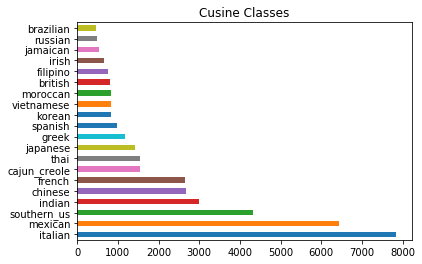

In [5]:
df.cuisine.value_counts().plot(kind='barh',
                               title='Cusine Classes')

### Ingredients

In [62]:
x = []

for i in df.itertuples():
    for ii in i.ingredients:
        x.append(ii)

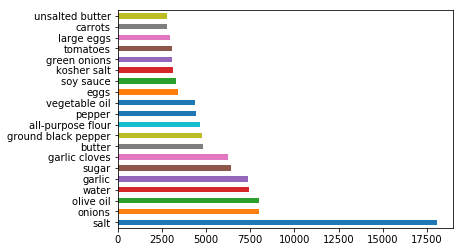

In [10]:
pd.Series(x).value_counts()[:20].plot(kind='barh')

In [13]:
print(f'{len(set(x))} unique ingredients')

6714 unique ingredients


### Testing word vectors

In [70]:
def get_word_vectors(words):
    # converts a list of words into their word vectors
    return [nlp(word).vector for word in words]

#words = ['pepper', 'kosher salt', 'salt', 'data', 'carrots', 'rice' , 'shanghai noodles']
words = list(set(cleaned_x))[:50]

# intialise pca model and tell it to project data down onto 2 dimensions
pca = PCA(n_components=2)

# fit the pca model to our 300D data, this will work out which is the best 
# way to project the data down that will best maintain the relative distances 
# between data points. It will store these intructioons on how to transform the data.
pca.fit(get_word_vectors(words))

# Tell our (fitted) pca model to transform our 300D data down onto 2D using the 
# instructions it learnt during the fit phase.
word_vecs_2d = pca.transform(get_word_vectors(words))

array([[-1.80854232e+00,  1.97698138e-02],
       [-1.40449465e+00, -5.84707283e-01],
       [-4.50801166e-01, -1.51313137e+00],
       [ 3.26579870e-02, -8.21290458e-01],
       [-4.09297472e-01, -1.99209961e+00],
       [ 4.19310831e-01,  1.22931149e+00],
       [-5.13263566e-01,  7.54237437e-01],
       [-1.94861768e+00, -1.82872086e+00],
       [ 1.18894939e+00, -5.34072162e-01],
       [ 2.70759205e+00, -1.57687070e+00],
       [-2.37462107e+00,  6.53372222e-01],
       [ 8.70244058e-01, -9.96801554e-01],
       [ 9.06421846e-01,  1.11121449e+00],
       [-1.01468391e+00, -2.12445499e+00],
       [ 2.05121993e+00,  2.02895449e+00],
       [ 1.27138547e+00,  2.14663122e+00],
       [-1.40200541e+00, -3.03574559e-01],
       [ 5.03479776e-01, -1.15997081e+00],
       [-1.38049796e+00,  7.67623010e-01],
       [-1.10005351e+00,  5.29930933e-01],
       [-7.89686674e-01, -1.54340962e+00],
       [ 2.79685309e-01,  6.64819001e-01],
       [ 3.63460302e+00,  2.26345295e+00],
       [-7.

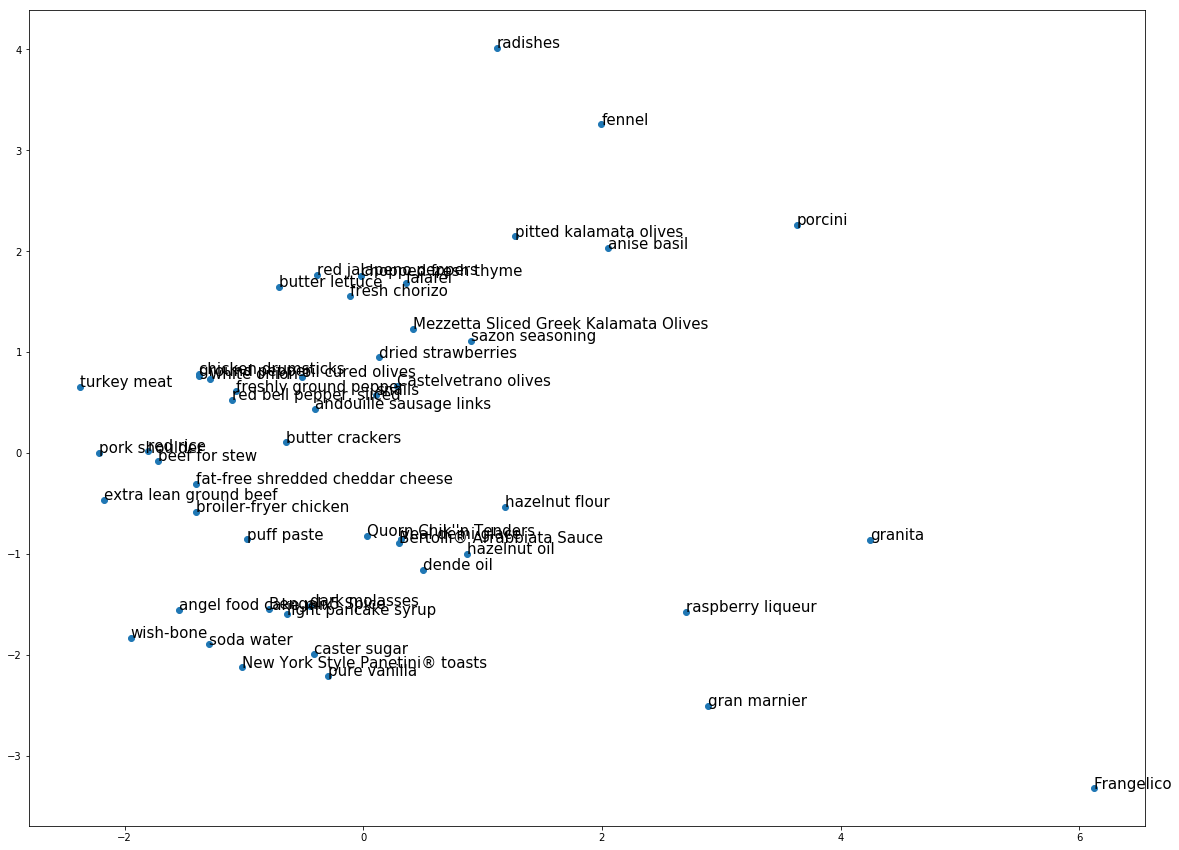

In [71]:
# create a nice big plot 
plt.figure(figsize=(20,15))

# plot the scatter plot of where the words will be
plt.scatter(word_vecs_2d[:,0], word_vecs_2d[:,1])

# for each word and coordinate pair: draw the text on the plot
for word, coord in zip(words, word_vecs_2d):
    x, y = coord
    plt.text(x, y, word, size= 15)

# show the plot
plt.show()

### One hot encoding

In [3]:
s = df['ingredients']

mlb = MultiLabelBinarizer()

df_onehot = pd.DataFrame(mlb.fit_transform(s),columns=mlb.classes_, index=df.cuisine)
df_onehot.head()

,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,1% low-fat chocolate milk,1% low-fat cottage cheese,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
cuisine,,,,,,,,,,,,,,,,,,,,,
greek,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
southern_us,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
filipino,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
indian,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
indian,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    df_onehot, df_onehot.index, test_size=0.3, random_state=0)

### TFIDF

In [ ]:
corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())


### Model

In [ ]:
rf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rf.fit(X_train, y_train)

In [79]:
train_predictions = rf.predict(X_test)
acc = accuracy_score(y_test, train_predictions)
acc

0.7130646107433168

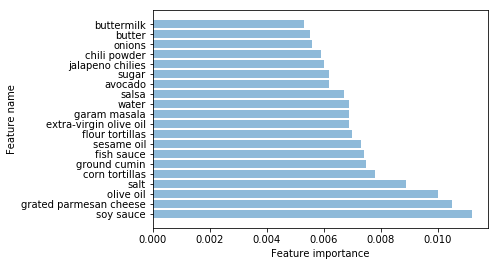

In [103]:
'''Plotting the important features'''
feature = list(zip(map(lambda x: round(x, 4), rf.feature_importances_), df_onehot.columns))   
top_20 = sorted(feature, key=lambda x: x[0], reverse=True)[:20]

length = np.arange(len(top_20))
plt.barh(length, [i[0] for i in top_20], align='center', alpha=0.5)
plt.yticks(length, [i[1] for i in top_20])
plt.ylabel('Feature name')
plt.xlabel('Feature importance')
plt.show()

In [98]:
sorted(feature, key=lambda x: x[0], reverse=True)[:20]

[(0.0112, 'soy sauce'),
 (0.0105, 'grated parmesan cheese'),
 (0.01, 'olive oil'),
 (0.0089, 'salt'),
 (0.0078, 'corn tortillas'),
 (0.0075, 'ground cumin'),
 (0.0074, 'fish sauce'),
 (0.0073, 'sesame oil'),
 (0.007, 'flour tortillas'),
 (0.0069, 'extra-virgin olive oil'),
 (0.0069, 'garam masala'),
 (0.0069, 'water'),
 (0.0067, 'salsa'),
 (0.0062, 'avocado'),
 (0.0062, 'sugar'),
 (0.006, 'jalapeno chilies'),
 (0.0059, 'chili powder'),
 (0.0056, 'onions'),
 (0.0055, 'butter'),
 (0.0053, 'buttermilk')]